# Chicago Crime
#### By Annivas Exarchos

## Table of Contents
- [Introduction](#Introduction)
- [Required Tools](#Required-Tools)
- [Data Collection](#1.-Data-Collection)
- [Data Processing](#2.-Data-Processing)
- [Data Collection](#1.-Data-Collection)
- [Heading](#heading-2)
  * [Sub-heading](#sub-heading-2)
    + [Sub-sub-heading](#sub-sub-heading-2)

## Required Tools

## Introduction

In [31]:
!pip install folium

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sodapy import Socrata
from folium.plugins import HeatMap

## 1. Data Collection

In [ ]:
apptoken = 'Lkysyak9elTtcNXRVmfsj9YLX'
client = Socrata("data.cityofchicago.org", None)

#client = Socrata("data.cityofchicago.org",
#              apptoken,
#              username="annivas.exa@gmail.com",
#              password="A1a2a3a46!")

results = client.get("ijzp-q8t2", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

In [378]:

domain = 'data.cityofchicago.org'
dataset_id = 'ijzp-q8t2'

token = 'Lkysyak9elTtcNXRVmfsj9YLX'

client = Socrata(domain, token)

results = client.get(dataset_id, where="date >= '2015-01-01' and date < '2020-01-01'", limit=2000000)
crime_table = pd.DataFrame.from_dict(results)
crime_table


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10225520,HY412735,2015-01-01T00:00:00.000,075XX S BLACKSTONE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,5,43,11,1187511,1855334,2015,2018-02-10T15:50:01.000,41.758131167,-87.588352326,"{'latitude': '41.758131167', 'longitude': '-87..."
1,11028448,JA360336,2015-01-01T00:00:00.000,051XX W HURON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,True,...,37,25,02,NaN,NaN,2015,2019-09-02T15:57:18.000,NaN,NaN,NaN
2,10225760,HY412902,2015-01-01T00:00:00.000,050XX N MARINE DR,0810,THEFT,OVER $500,APARTMENT,False,False,...,48,3,06,1169650,1934124,2015,2018-02-10T15:50:01.000,41.974742888,-87.651517395,"{'latitude': '41.974742888', 'longitude': '-87..."
3,11242929,JB168310,2015-01-01T00:00:00.000,049XX S COTTAGE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,4,39,11,NaN,NaN,2015,2018-03-01T15:54:55.000,NaN,NaN,NaN
4,10229179,HY416572,2015-01-01T00:00:00.000,039XX S LAKE PARK AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,4,36,20,1183388,1878984,2015,2018-02-10T15:50:01.000,41.823125769,-87.602725951,"{'latitude': '41.823125769', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331379,11937967,JC567053,2019-12-31T23:46:00.000,034XX W JACKSON BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,...,28,27,15,1153587,1898480,2019,2020-01-07T15:52:21.000,41.877268465,-87.711536692,"{'latitude': '41.877268465', 'longitude': '-87..."
1331380,11938240,JD100002,2019-12-31T23:48:00.000,004XX S CICERO AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,True,False,...,29,25,15,1144466,1897452,2019,2020-01-07T15:52:21.000,41.874623951,-87.745052647,"{'latitude': '41.874623951', 'longitude': '-87..."
1331381,11938857,JD100599,2019-12-31T23:50:00.000,004XX N Ashland ave,0820,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,...,27,24,06,NaN,NaN,2019,2020-01-07T15:52:21.000,NaN,NaN,NaN
1331382,11940078,JD100016,2019-12-31T23:54:00.000,063XX S MAY ST,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,16,68,04B,1169736,1862855,2019,2020-01-08T15:47:27.000,41.779173667,-87.653277703,"{'latitude': '41.779173667', 'longitude': '-87..."


In [379]:
crime_table.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10225520,HY412735,2015-01-01T00:00:00.000,075XX S BLACKSTONE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,5,43,11,1187511,1855334,2015,2018-02-10T15:50:01.000,41.758131167,-87.588352326,"{'latitude': '41.758131167', 'longitude': '-87..."
1,11028448,JA360336,2015-01-01T00:00:00.000,051XX W HURON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,True,...,37,25,02,NaN,NaN,2015,2019-09-02T15:57:18.000,NaN,NaN,NaN
2,10225760,HY412902,2015-01-01T00:00:00.000,050XX N MARINE DR,0810,THEFT,OVER $500,APARTMENT,False,False,...,48,3,06,1169650,1934124,2015,2018-02-10T15:50:01.000,41.974742888,-87.651517395,"{'latitude': '41.974742888', 'longitude': '-87..."
3,11242929,JB168310,2015-01-01T00:00:00.000,049XX S COTTAGE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,4,39,11,NaN,NaN,2015,2018-03-01T15:54:55.000,NaN,NaN,NaN
4,10229179,HY416572,2015-01-01T00:00:00.000,039XX S LAKE PARK AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,4,36,20,1183388,1878984,2015,2018-02-10T15:50:01.000,41.823125769,-87.602725951,"{'latitude': '41.823125769', 'longitude': '-87..."


In [380]:
crime_table['primary_type'].describe()

count     1331384
unique         34
top         THEFT
freq       311036
Name: primary_type, dtype: object

In [381]:
crime_type_occ = crime_table['primary_type'].value_counts()
for i in crime_type_occ:
    if i < 
crime_type_occ

THEFT                                311036
BATTERY                              247752
CRIMINAL DAMAGE                      143240
ASSAULT                               96110
DECEPTIVE PRACTICE                    93088
OTHER OFFENSE                         86117
NARCOTICS                             77579
BURGLARY                              61849
MOTOR VEHICLE THEFT                   51699
ROBBERY                               51148
CRIMINAL TRESPASS                     33247
WEAPONS VIOLATION                     23295
OFFENSE INVOLVING CHILDREN            11653
PUBLIC PEACE VIOLATION                 8419
CRIM SEXUAL ASSAULT                    6894
INTERFERENCE WITH PUBLIC OFFICER       6183
SEX OFFENSE                            5534
PROSTITUTION                           4255
HOMICIDE                               3068
ARSON                                  2161
LIQUOR LAW VIOLATION                   1210
CRIMINAL SEXUAL ASSAULT                1037
GAMBLING                        

In [382]:
crime_types = crime_table['primary_type'].unique()
crime_types

array(['DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT', 'THEFT',
       'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE', 'SEX OFFENSE',
       'OBSCENITY', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL DAMAGE',
       'BATTERY', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 'BURGLARY',
       'ASSAULT', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'NARCOTICS', 'ROBBERY', 'LIQUOR LAW VIOLATION', 'STALKING',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'HOMICIDE', 'HUMAN TRAFFICKING', 'KIDNAPPING', 'PUBLIC INDECENCY',
       'NON - CRIMINAL', 'GAMBLING', 'NON-CRIMINAL',
       'CONCEALED CARRY LICENSE VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [386]:
mean_type = crime_table['primary_type'].value_counts(normalize=True)
mean_type

THEFT                                0.233619
BATTERY                              0.186086
CRIMINAL DAMAGE                      0.107587
ASSAULT                              0.072188
DECEPTIVE PRACTICE                   0.069918
OTHER OFFENSE                        0.064682
NARCOTICS                            0.058269
BURGLARY                             0.046455
MOTOR VEHICLE THEFT                  0.038831
ROBBERY                              0.038417
CRIMINAL TRESPASS                    0.024972
WEAPONS VIOLATION                    0.017497
OFFENSE INVOLVING CHILDREN           0.008753
PUBLIC PEACE VIOLATION               0.006323
CRIM SEXUAL ASSAULT                  0.005178
INTERFERENCE WITH PUBLIC OFFICER     0.004644
SEX OFFENSE                          0.004157
PROSTITUTION                         0.003196
HOMICIDE                             0.002304
ARSON                                0.001623
LIQUOR LAW VIOLATION                 0.000909
CRIMINAL SEXUAL ASSAULT           

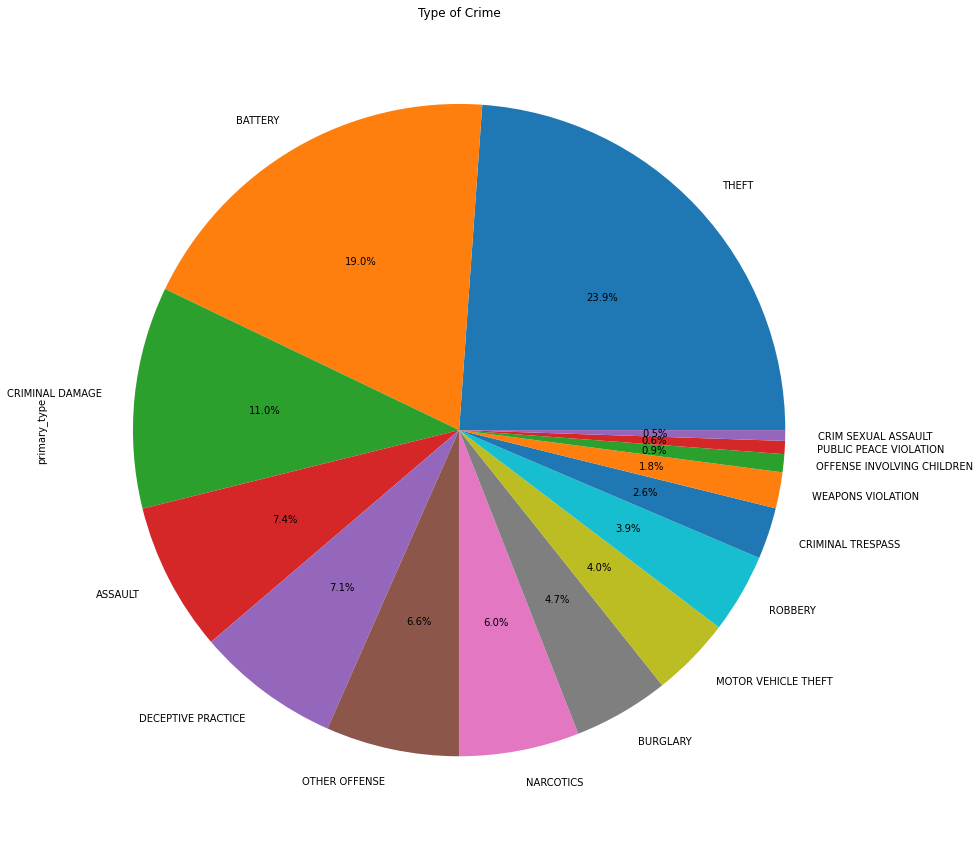

In [398]:
crime_table['primary_type'].value_counts()[0:15].plot(kind='pie', figsize=(15, 15), title="Type of Crime", autopct='%1.1f%%')
plt.show()

In [135]:
crime_table['primary_type'].value_counts(normalize=True)

THEFT                                2.288686e-01
BATTERY                              1.878566e-01
CRIMINAL DAMAGE                      1.091432e-01
ASSAULT                              7.419960e-02
DECEPTIVE PRACTICE                   7.050570e-02
OTHER OFFENSE                        6.399464e-02
NARCOTICS                            5.523585e-02
BURGLARY                             4.587951e-02
MOTOR VEHICLE THEFT                  3.988297e-02
ROBBERY                              3.834200e-02
CRIMINAL TRESPASS                    2.434965e-02
WEAPONS VIOLATION                    2.041973e-02
OFFENSE INVOLVING CHILDREN           8.758131e-03
PUBLIC PEACE VIOLATION               6.311007e-03
CRIM SEXUAL ASSAULT                  4.561472e-03
INTERFERENCE WITH PUBLIC OFFICER     4.452290e-03
SEX OFFENSE                          4.186852e-03
PROSTITUTION                         2.959694e-03
HOMICIDE                             2.495505e-03
ARSON                                1.777647e-03


In [356]:
property_crimes = pd.read_csv("https://annivas.github.io/property_crimes_usafacts.csv")
property_crimes

,Years,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Property crimes,12063700,12061900,11652000,10850500,10608500,11102600,11722700,12024700.0,12356900.0,...,9337060.0,9112625.0,9052743.0,9001992.0,8651892.0,8209010.0,8024115.0,7928530.0,7682988.0,7196045.0
1,By region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Northeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1174338.0,1170424.0,NaN,NaN,NaN,NaN,NaN,NaN,872031.0,805435.0
3,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2126054.0,2076730.0,NaN,NaN,NaN,NaN,NaN,NaN,2081184.0,1977420.0
4,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4096256.0,3939317.0,NaN,NaN,NaN,NaN,NaN,NaN,3232483.0,3035624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,North Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,343707.0,328719.0,NaN,NaN,NaN,NaN,NaN,NaN,265483.0,258979.0
62,Sources:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,Agency,Source,Table,Url,Direct Link,Updated,Update Schedule,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,Federal Bureau of Investigation,"Uniform Crime Reporting Program, Crime in the ...",NaN,https://ucr.fbi.gov/crime-in-the-u.s/2018/crim...,NaN,2019,Yearly,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
burglary_table = crime_table.loc[crime_table['primary_type']=='BURGLARY']
burglary_table

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
291,9913600,HY100450,2015-01-01T00:01:00.000,054XX W FOSTER AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,45,11,05,1138914,1934045,2015,2018-02-10T15:50:01.000,41.975141744,-87.76454628,"{'latitude': '41.975141744', 'longitude': '-87..."
388,9911420,HY100469,2015-01-01T01:00:00.000,031XX W WASHINGTON BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,28,27,05,1155344,1900511,2015,2018-02-10T15:50:01.000,41.882806623,-87.705030858,"{'latitude': '41.882806623', 'longitude': '-87..."
446,9911551,HY100426,2015-01-01T02:00:00.000,008XX W HAINES ST,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,False,...,32,8,05,1170472,1907258,2015,2018-02-10T15:50:01.000,41.901003465,-87.649282987,"{'latitude': '41.901003465', 'longitude': '-87..."
451,9914392,HY103695,2015-01-01T02:00:00.000,046XX W HARRISON ST,0620,BURGLARY,UNLAWFUL ENTRY,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,24,25,05,1145594,1896954,2015,2018-02-10T15:50:01.000,41.873236088,-87.740923693,"{'latitude': '41.873236088', 'longitude': '-87..."
581,9911384,HY100427,2015-01-01T04:50:00.000,063XX N LINCOLN AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,50,13,05,1151825,1941814,2015,2018-02-10T15:50:01.000,41.996215265,-87.716862144,"{'latitude': '41.996215265', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529435,12243321,JD456898,2020-12-11T18:30:00.000,001XX N SANGAMON ST,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False,...,27,28,05,1170062,1901427,2020,2020-12-18T15:51:11.000,41.885011786,-87.650959272,"{'latitude': '41.885011786', 'longitude': '-87..."
1529446,12243406,JD456879,2020-12-11T19:10:00.000,017XX W SCHOOL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,47,6,05,1164001,1921953,2020,2020-12-18T15:51:11.000,41.941466605,-87.672635538,"{'latitude': '41.941466605', 'longitude': '-87..."
1529450,12243263,JD456923,2020-12-11T19:15:00.000,070XX N WESTERN AVE,0610,BURGLARY,FORCIBLE ENTRY,BARBERSHOP,False,False,...,50,2,05,1159045,1946546,2020,2020-12-18T15:51:11.000,42.00905433,-87.690172193,"{'latitude': '42.00905433', 'longitude': '-87...."
1529511,12243412,JD457144,2020-12-11T22:05:00.000,024XX W LUNT AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,50,2,05,1158866,1946394,2020,2020-12-18T15:51:11.000,42.008640925,-87.690834984,"{'latitude': '42.008640925', 'longitude': '-87..."


In [181]:
burglary_table.dtypes

id                      object
case_number             object
date                    object
block                   object
iucr                    object
primary_type            object
description             object
location_description    object
arrest                    bool
domestic                  bool
beat                    object
district                object
ward                    object
community_area          object
fbi_code                object
x_coordinate            object
y_coordinate            object
year                    object
updated_on              object
latitude                object
longitude               object
location                object
dtype: object

In [207]:
burglaries_by_year = burglary_table['year'].value_counts().sort_index()
burglaries_by_year

2015    13183
2016    14287
2017    12999
2018    11746
2019     9634
2020     8326
Name: year, dtype: int64

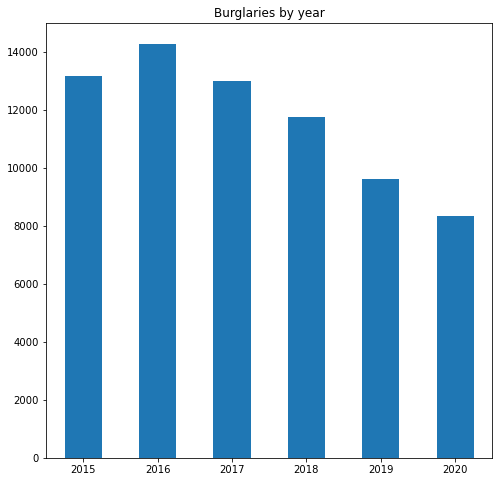

In [358]:
burglaries_by_year.plot(kind='bar', figsize=(8, 8), title="Burglaries by year", rot=0)
plt.show()

In [209]:
burglary_table['date'] = pd.to_datetime(burglary_table['date'])
burglary_table.dtypes




<ipython-input-209-1862b06c08d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary_table['date'] = pd.to_datetime(burglary_table['date'])


id                              object
case_number                     object
date                    datetime64[ns]
block                           object
iucr                            object
primary_type                    object
description                     object
location_description            object
arrest                            bool
domestic                          bool
beat                            object
district                        object
ward                            object
community_area                  object
fbi_code                        object
x_coordinate                    object
y_coordinate                    object
year                            object
updated_on                      object
latitude                        object
longitude                       object
location                        object
dtype: object

In [210]:
burglaries_by_date = burglary_table['date'].value_counts().sort_index()
burglaries_by_date

2015-01-01 00:01:00    1
2015-01-01 01:00:00    1
2015-01-01 02:00:00    2
2015-01-01 04:50:00    1
2015-01-01 08:00:00    1
                      ..
2020-12-11 18:30:00    1
2020-12-11 19:10:00    1
2020-12-11 19:15:00    1
2020-12-11 22:05:00    1
2020-12-11 23:24:00    1
Name: date, Length: 56385, dtype: int64

In [213]:
burglary_table['month'] = pd.DatetimeIndex(burglary_table['date']).month
burglary_table.head()


<ipython-input-213-9fef68cbc321>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary_table['month'] = pd.DatetimeIndex(burglary_table['date']).month


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month
291,9913600,HY100450,2015-01-01 00:01:00,054XX W FOSTER AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,11,05,1138914,1934045,2015,2018-02-10T15:50:01.000,41.975141744,-87.76454628,"{'latitude': '41.975141744', 'longitude': '-87...",1
388,9911420,HY100469,2015-01-01 01:00:00,031XX W WASHINGTON BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,27,05,1155344,1900511,2015,2018-02-10T15:50:01.000,41.882806623,-87.705030858,"{'latitude': '41.882806623', 'longitude': '-87...",1
446,9911551,HY100426,2015-01-01 02:00:00,008XX W HAINES ST,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,False,...,8,05,1170472,1907258,2015,2018-02-10T15:50:01.000,41.901003465,-87.649282987,"{'latitude': '41.901003465', 'longitude': '-87...",1
451,9914392,HY103695,2015-01-01 02:00:00,046XX W HARRISON ST,0620,BURGLARY,UNLAWFUL ENTRY,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,25,05,1145594,1896954,2015,2018-02-10T15:50:01.000,41.873236088,-87.740923693,"{'latitude': '41.873236088', 'longitude': '-87...",1
581,9911384,HY100427,2015-01-01 04:50:00,063XX N LINCOLN AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,13,05,1151825,1941814,2015,2018-02-10T15:50:01.000,41.996215265,-87.716862144,"{'latitude': '41.996215265', 'longitude': '-87...",1


In [233]:
burglaries_by_month = burglary_table['month'].value_counts().sort_index()
burglaries_by_month

1     6007
2     4503
3     4891
4     5001
5     6351
6     5905
7     6519
8     6953
9     6125
10    6313
11    5984
12    5623
Name: month, dtype: int64

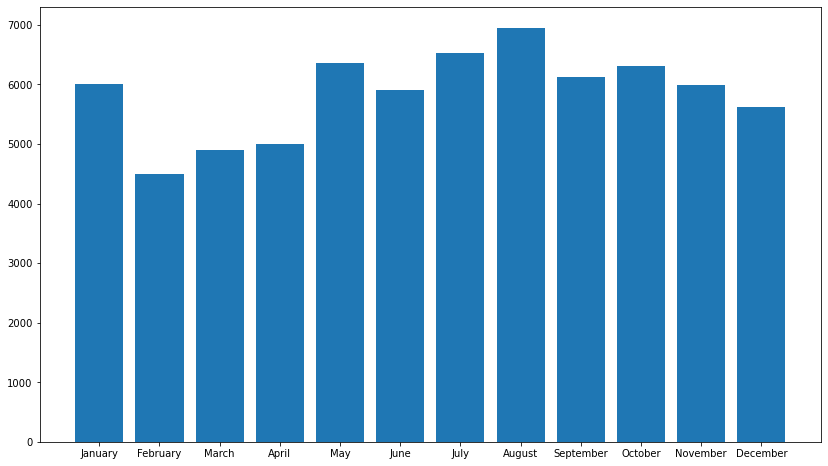

In [372]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 8))
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y = burglaries_by_month
plt.bar(x,y)
plt.show()

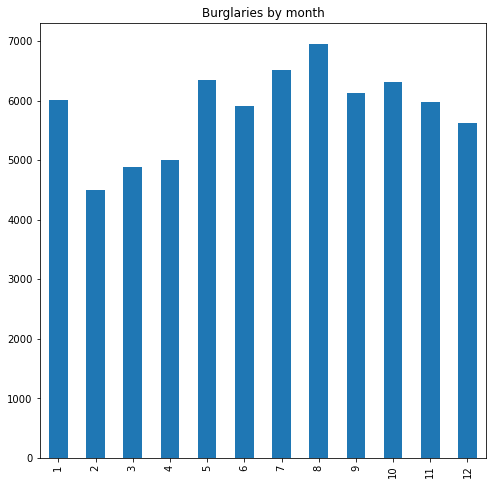

In [366]:
burglaries_by_month.plot(kind='bar', figsize=(8, 8), title="Burglaries by month")
plt.show()

In [272]:
burglary_table['time'] = pd.DatetimeIndex(burglary_table['date']).time
burglary_table

<ipython-input-272-7cc83350300f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary_table['time'] = pd.DatetimeIndex(burglary_table['date']).time


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,time
291,9913600,HY100450,2015-01-01 00:01:00,054XX W FOSTER AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,05,1138914,1934045,2015,2018-02-10T15:50:01.000,41.975141744,-87.76454628,"{'latitude': '41.975141744', 'longitude': '-87...",1,00:01:00
388,9911420,HY100469,2015-01-01 01:00:00,031XX W WASHINGTON BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,05,1155344,1900511,2015,2018-02-10T15:50:01.000,41.882806623,-87.705030858,"{'latitude': '41.882806623', 'longitude': '-87...",1,01:00:00
446,9911551,HY100426,2015-01-01 02:00:00,008XX W HAINES ST,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,False,...,05,1170472,1907258,2015,2018-02-10T15:50:01.000,41.901003465,-87.649282987,"{'latitude': '41.901003465', 'longitude': '-87...",1,02:00:00
451,9914392,HY103695,2015-01-01 02:00:00,046XX W HARRISON ST,0620,BURGLARY,UNLAWFUL ENTRY,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,05,1145594,1896954,2015,2018-02-10T15:50:01.000,41.873236088,-87.740923693,"{'latitude': '41.873236088', 'longitude': '-87...",1,02:00:00
581,9911384,HY100427,2015-01-01 04:50:00,063XX N LINCOLN AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,05,1151825,1941814,2015,2018-02-10T15:50:01.000,41.996215265,-87.716862144,"{'latitude': '41.996215265', 'longitude': '-87...",1,04:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529435,12243321,JD456898,2020-12-11 18:30:00,001XX N SANGAMON ST,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False,...,05,1170062,1901427,2020,2020-12-18T15:51:11.000,41.885011786,-87.650959272,"{'latitude': '41.885011786', 'longitude': '-87...",12,18:30:00
1529446,12243406,JD456879,2020-12-11 19:10:00,017XX W SCHOOL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,05,1164001,1921953,2020,2020-12-18T15:51:11.000,41.941466605,-87.672635538,"{'latitude': '41.941466605', 'longitude': '-87...",12,19:10:00
1529450,12243263,JD456923,2020-12-11 19:15:00,070XX N WESTERN AVE,0610,BURGLARY,FORCIBLE ENTRY,BARBERSHOP,False,False,...,05,1159045,1946546,2020,2020-12-18T15:51:11.000,42.00905433,-87.690172193,"{'latitude': '42.00905433', 'longitude': '-87....",12,19:15:00
1529511,12243412,JD457144,2020-12-11 22:05:00,024XX W LUNT AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,05,1158866,1946394,2020,2020-12-18T15:51:11.000,42.008640925,-87.690834984,"{'latitude': '42.008640925', 'longitude': '-87...",12,22:05:00


In [325]:
burglary_table['day'] = pd.DatetimeIndex(burglary_table['date']).date
burglary_table

<ipython-input-325-1548adda7fca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary_table['day'] = pd.DatetimeIndex(burglary_table['date']).date


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,time,day
291,9913600,HY100450,2015-01-01 00:01:00,054XX W FOSTER AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,1138914,1934045,2015,2018-02-10T15:50:01.000,41.975141744,-87.76454628,"{'latitude': '41.975141744', 'longitude': '-87...",1,00:01:00,2015-01-01
388,9911420,HY100469,2015-01-01 01:00:00,031XX W WASHINGTON BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,1155344,1900511,2015,2018-02-10T15:50:01.000,41.882806623,-87.705030858,"{'latitude': '41.882806623', 'longitude': '-87...",1,01:00:00,2015-01-01
446,9911551,HY100426,2015-01-01 02:00:00,008XX W HAINES ST,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,False,...,1170472,1907258,2015,2018-02-10T15:50:01.000,41.901003465,-87.649282987,"{'latitude': '41.901003465', 'longitude': '-87...",1,02:00:00,2015-01-01
451,9914392,HY103695,2015-01-01 02:00:00,046XX W HARRISON ST,0620,BURGLARY,UNLAWFUL ENTRY,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,1145594,1896954,2015,2018-02-10T15:50:01.000,41.873236088,-87.740923693,"{'latitude': '41.873236088', 'longitude': '-87...",1,02:00:00,2015-01-01
581,9911384,HY100427,2015-01-01 04:50:00,063XX N LINCOLN AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,1151825,1941814,2015,2018-02-10T15:50:01.000,41.996215265,-87.716862144,"{'latitude': '41.996215265', 'longitude': '-87...",1,04:50:00,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529435,12243321,JD456898,2020-12-11 18:30:00,001XX N SANGAMON ST,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False,...,1170062,1901427,2020,2020-12-18T15:51:11.000,41.885011786,-87.650959272,"{'latitude': '41.885011786', 'longitude': '-87...",12,18:30:00,2020-12-11
1529446,12243406,JD456879,2020-12-11 19:10:00,017XX W SCHOOL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,1164001,1921953,2020,2020-12-18T15:51:11.000,41.941466605,-87.672635538,"{'latitude': '41.941466605', 'longitude': '-87...",12,19:10:00,2020-12-11
1529450,12243263,JD456923,2020-12-11 19:15:00,070XX N WESTERN AVE,0610,BURGLARY,FORCIBLE ENTRY,BARBERSHOP,False,False,...,1159045,1946546,2020,2020-12-18T15:51:11.000,42.00905433,-87.690172193,"{'latitude': '42.00905433', 'longitude': '-87....",12,19:15:00,2020-12-11
1529511,12243412,JD457144,2020-12-11 22:05:00,024XX W LUNT AVE,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,1158866,1946394,2020,2020-12-18T15:51:11.000,42.008640925,-87.690834984,"{'latitude': '42.008640925', 'longitude': '-87...",12,22:05:00,2020-12-11


In [281]:
burglary_table.dtypes

id                              object
case_number                     object
date                    datetime64[ns]
block                           object
iucr                            object
primary_type                    object
description                     object
location_description            object
arrest                            bool
domestic                          bool
beat                            object
district                        object
ward                            object
community_area                  object
fbi_code                        object
x_coordinate                    object
y_coordinate                    object
year                            object
updated_on                      object
latitude                        object
longitude                       object
location                        object
month                            int64
time                            object
dtype: object

In [301]:
burglaries_by_time = pd.DataFrame(data=burglary_table['time'])
burglaries_by_time

,time
291,00:01:00
388,01:00:00
446,02:00:00
451,02:00:00
581,04:50:00
...,...
1529435,18:30:00
1529446,19:10:00
1529450,19:15:00
1529511,22:05:00


In [322]:
y

2015-01-01 00:01:00    1
2015-01-01 01:00:00    1
2015-01-01 02:00:00    2
2015-01-01 04:50:00    1
2015-01-01 08:00:00    1
                      ..
2020-12-11 18:30:00    1
2020-12-11 19:10:00    1
2020-12-11 19:15:00    1
2020-12-11 22:05:00    1
2020-12-11 23:24:00    1
Name: date, Length: 56385, dtype: int64

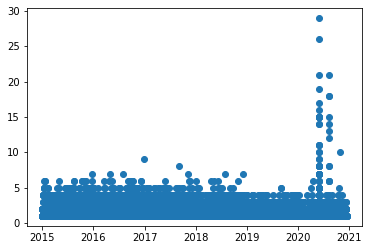

In [323]:
plt.plot_date(x,y)
# beautify the x-labels
#plt.gcf().autofmt_xdate()
plt.show()

In [343]:
burglaries_by_date = pd.DataFrame(burglary_table['day'])
burglaries_by_date['burglaries_per_day'] = burglaries_by_date.groupby('day')['day'].transform('size')
burglaries_by_date.drop_duplicates()

,day,burglaries_per_day
291,2015-01-01,16
1218,2015-01-02,33
1891,2015-01-03,21
2576,2015-01-04,16
3063,2015-01-05,38
...,...,...
1527207,2020-12-07,18
1527676,2020-12-08,14
1528201,2020-12-09,12
1528618,2020-12-10,10


In [347]:
burglaries_by_date = burglaries_by_date.loc[burglaries_by_date['burglaries_per_day'] < 100]

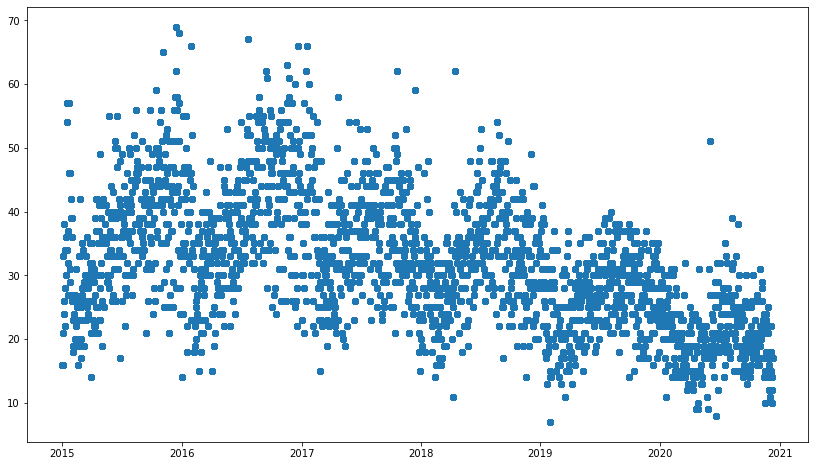

In [377]:
figure(num=None, figsize=(14, 8))
plt.plot_date(burglaries_by_date['day'], burglaries_by_date['burglaries_per_day'])
plt.show()

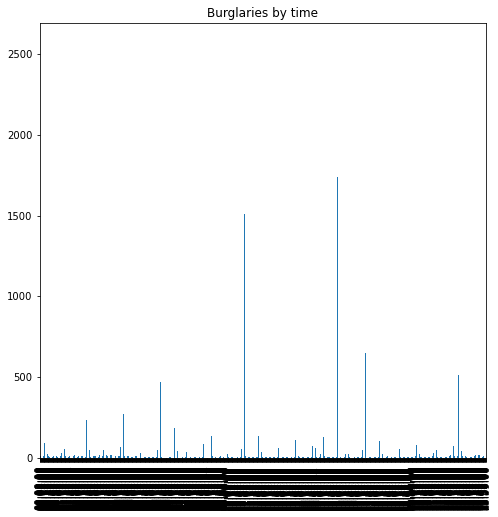

In [241]:
burglaries_by_time.plot(kind='bar', figsize=(8, 8), title="Burglaries by time")
plt.show()

In [125]:
# Take sample of 10,000 rows
sample_table = crime_table.sample(n=10000)
sample_table

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
447147,10668543,HZ419708,2016-09-04T01:10:00.000,020XX N MILWAUKEE AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,1,22,08B,1159295,1913552,2016,2018-02-10T15:50:01.000,41.918511914,-87.690163597,"{'latitude': '41.918511914', 'longitude': '-87..."
203112,10263717,HY451420,2015-10-05T15:00:00.000,044XX N BERNARD ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,33,14,06,1152591,1929208,2015,2018-02-10T15:50:01.000,41.961608504,-87.714379434,"{'latitude': '41.961608504', 'longitude': '-87..."
1288173,11874507,JC489167,2019-10-27T20:14:00.000,035XX S MICHIGAN AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,False,False,...,3,35,26,1177772,1881665,2019,2019-11-03T15:53:25.000,41.830611847,-87.623247369,"{'latitude': '41.830611847', 'longitude': '-87..."
163671,10196328,HY383772,2015-08-15T18:09:00.000,016XX E 79TH ST,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,ALLEY,True,False,...,8,43,24,1188735,1852930,2015,2018-02-10T15:50:01.000,41.751505198,-87.5839433,"{'latitude': '41.751505198', 'longitude': '-87..."
1255010,11828183,JC433079,2019-09-12T09:00:00.000,024XX N JANSSEN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,2,7,26,1166230,1916349,2019,2019-09-19T16:14:07.000,41.926041498,-87.664603756,"{'latitude': '41.926041498', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337181,11952720,JD117229,2020-01-09T16:17:00.000,022XX E 100TH ST,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,...,7,51,06,1192936,1839105,2020,2020-01-18T15:44:11.000,41.71346669,-87.568998811,"{'latitude': '41.71346669', 'longitude': '-87...."
389696,10602088,HZ322011,2016-06-24T19:01:00.000,054XX W WALTON ST,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),VEHICLE NON-COMMERCIAL,True,False,...,37,25,18,1139924,1905802,2016,2018-02-10T15:50:01.000,41.897621617,-87.761524853,"{'latitude': '41.897621617', 'longitude': '-87..."
1100417,11596930,JC153698,2019-02-15T15:00:00.000,009XX N WELLS ST,0460,BATTERY,SIMPLE,"SCHOOL, PRIVATE, GROUNDS",False,False,...,27,8,08B,1174545,1906918,2019,2019-02-22T16:04:55.000,41.899980394,-87.634332851,"{'latitude': '41.899980394', 'longitude': '-87..."
185052,10232176,HY419842,2015-09-11T20:30:00.000,008XX W ALTGELD ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,43,7,06,1170285,1916824,2015,2018-02-10T15:50:01.000,41.927257174,-87.649689774,"{'latitude': '41.927257174', 'longitude': '-87..."


In [164]:
# Create map
map_osm = folium.Map(location=[41.88, -87.63], zoom_start=11)

# 
heat_table = sample_table[sample_table['location'].notna()]
#
heat_data = [[row['latitude'], row['longitude']] for index, row in heat_table.iterrows()]

# Create heat map
HeatMap(heat_data, radius=20).add_to(map_osm)
    
map_osm